In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('amazon_sales_data 2025.csv')
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [3]:
df.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

In [4]:
df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [8]:
sales = df.groupby('Category')['Total Sales'].sum()
print(sales)


Category
Books                1035
Clothing             3540
Electronics        129950
Footwear             4320
Home Appliances    105000
Name: Total Sales, dtype: int64


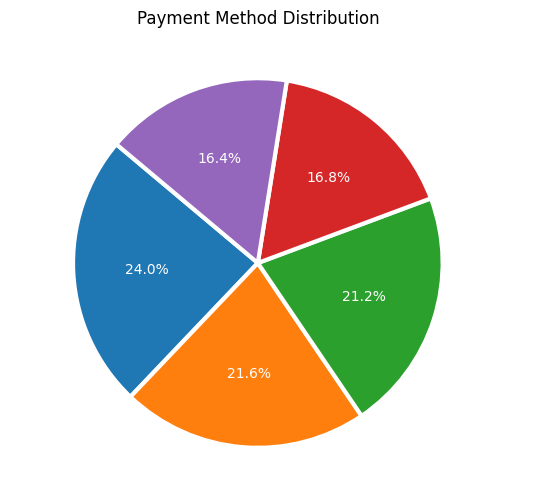

In [30]:
#To analyse payment method using piechart visualization
payment_analysis = df['Payment Method'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(payment_analysis, labels=payment_analysis.index, autopct='%1.1f%%', startangle=140,wedgeprops={'linewidth':3,'edgecolor': 'white'},textprops={'color': 'white'})
plt.title('Payment Method Distribution')
plt.show()


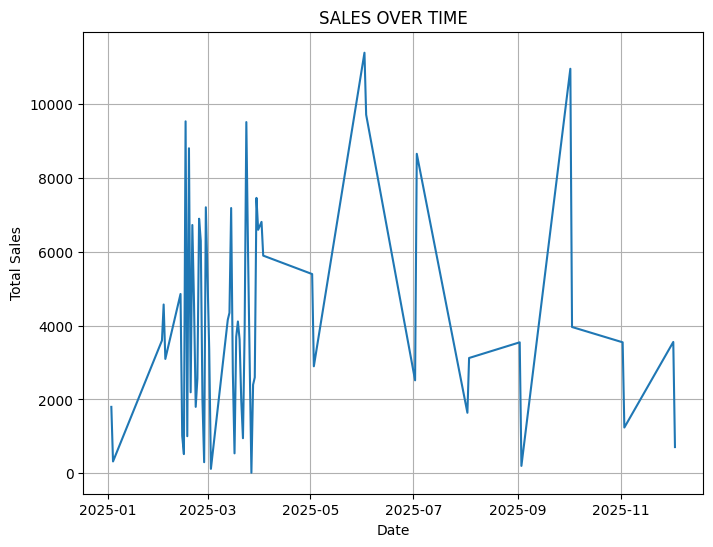

In [31]:
df['Date'] = pd.to_datetime(df['Date'])
sales_trend = df.groupby('Date')['Total Sales'].sum()
plt.figure(figsize=(8,6))
plt.plot(sales_trend.index, sales_trend.values)
plt.title('SALES OVER TIME')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

C:\Users\Debjani Ghosh\AppData\Local\Temp\ipykernel_15304\3019500415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values,palette='pastel')


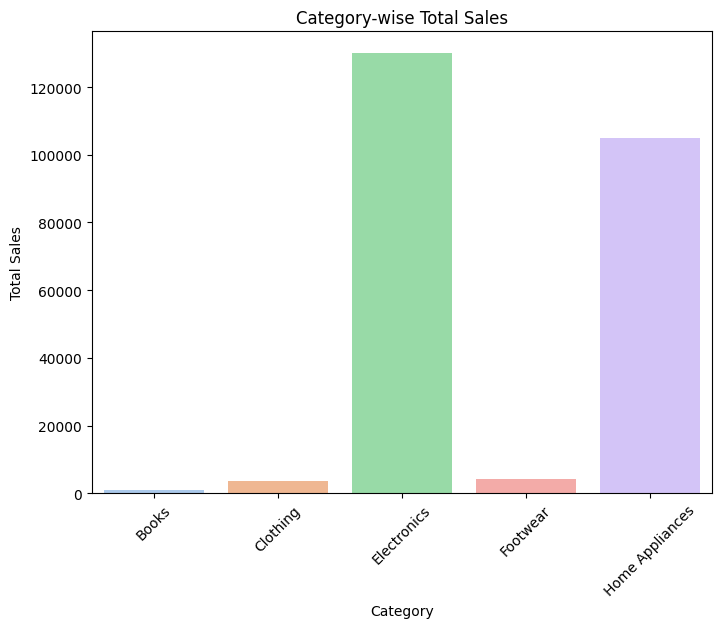

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x=category_sales.index, y=category_sales.values,palette='pastel')
plt.title('Category-wise Total Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


C:\Users\Debjani Ghosh\AppData\Local\Temp\ipykernel_15304\2748121783.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='pastel')


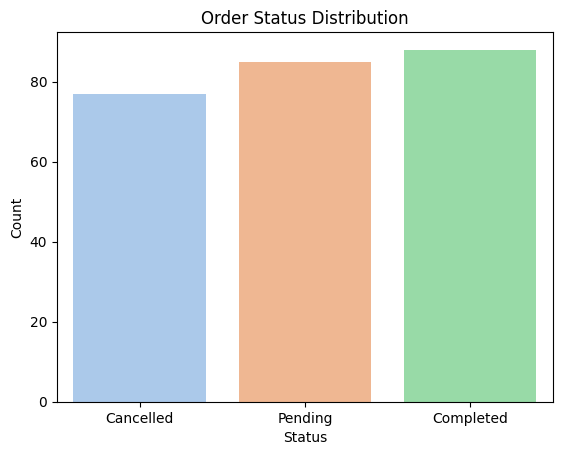

In [25]:
sns.countplot(data=df, x='Status', palette='pastel')
plt.title('Order Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


In [28]:
correlation = np.corrcoef(df['Price'], df['Quantity'])[0,1]
print(f"Correlation between Price and Quantity: {correlation}")

Correlation between Price and Quantity: -0.010858214209771202


In [33]:
top_customers = df.groupby('Customer Name')['Total Sales'].sum().sort_values(ascending=False).head(10)
print(top_customers)


Customer Name
Olivia Wilson    36170
Jane Smith       31185
Emma Clark       29700
John Doe         26870
Emily Johnson    23475
David Lee        22665
Michael Brown    22655
Daniel Harris    18945
Chris White      18885
Sophia Miller    13295
Name: Total Sales, dtype: int64


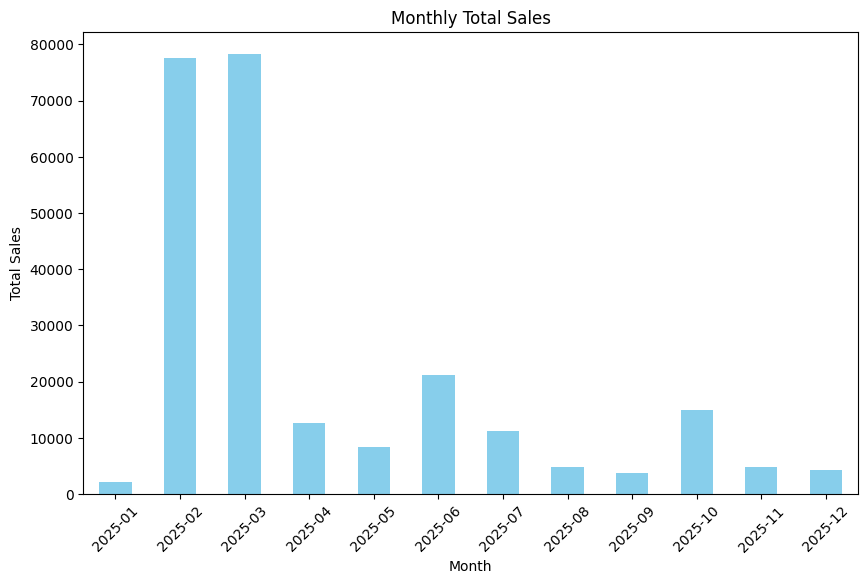

In [29]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Sales'].sum()
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
